In [2]:
# Compression example using SVD decomposition
# Original MATLAB code and example explained:
    # Author: Andrew Gibiansky
    # Source: https://andrew.gibiansky.com/blog/mathematics/cool-linear-algebra-singular-value-decomposition/
    # Date: 5/29/2013

    # Rewritten in Python by: Irina Gasilova
    # Date: 4/8/2025

In [26]:
#!pip install scikit-image
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

In [28]:
# Load and prepare the image
# This script uses grayscale for clarity and to keep SVD meaningful.
tiger = imread('tiger.jpg')
tiger_gray = rgb2gray(tiger)

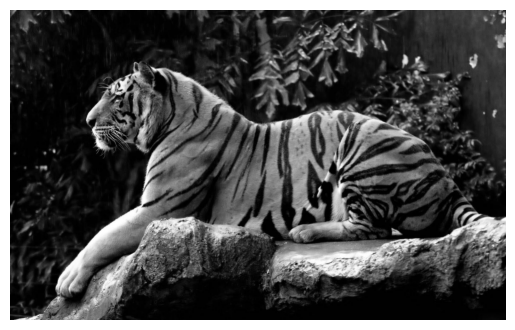

In [30]:
# Downsampled by 0.5 for performance.
height, width = tiger_gray.shape
tiger_resized = resize(tiger_gray, (height // 2, width // 2), anti_aliasing=True)

# No extra normalization needed if using rgb2gray() and resize() from skimage, 
# since they already return [0, 1] floats.

# Display
plt.imshow(tiger_gray, cmap='gray')
plt.axis('off')
plt.show()

In [32]:
# SVD on resized grayscale image
U, S, Vt = np.linalg.svd(tiger_resized, full_matrices=False)
sigmas = np.copy(S)

In [34]:
# Additional comments:
# Numpy by default return full matrices while doing SVD decomposition.
# full_matrices=False: This is called the "reduced" or "compact" SVD. It's faster, takes less memory, and is usually what you want — especially for things like image compression, PCA, etc.
# Given a matrix A of shape m×n:
# U has shape mxk,
# S has length k,
# V_T has shape kxn, where k = min(m,n)

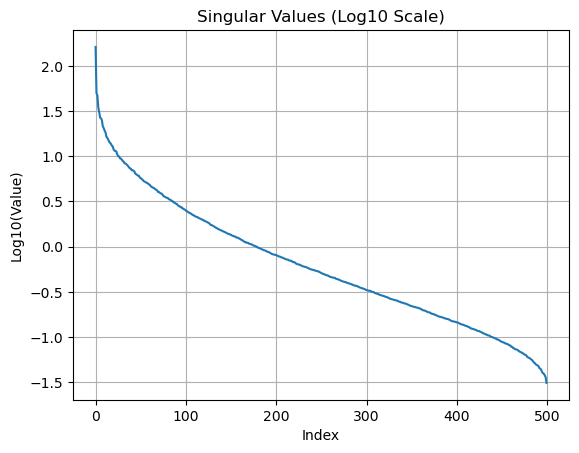

In [38]:
# Plot the magnitude of the singular values (log scale)
# Filter out zero values before applying log10
nonzero_sigmas = sigmas[sigmas > 0]

plt.figure()
plt.plot(np.log10(nonzero_sigmas))
plt.title('Singular Values (Log10 Scale)');
plt.xlabel('Index')
plt.ylabel('Log10(Value)')
plt.grid(True)
plt.show()

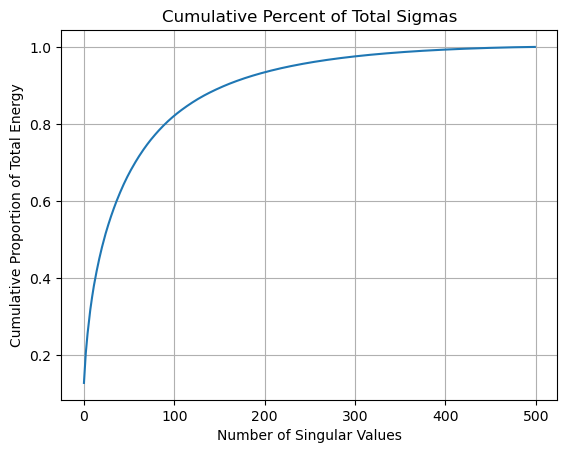

In [40]:
# Plot the magnitude of the singular values (log scale)
cumulative_energy = np.cumsum(nonzero_sigmas) / np.sum(nonzero_sigmas)

plt.figure()
plt.plot(cumulative_energy)
plt.title('Cumulative Percent of Total Sigmas')
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Proportion of Total Energy')
plt.grid(True)
plt.show()

We will see not that after about fifty components, adding more singular values doesn’t visually seem to improve image quality. 
By SVD application, a 500x800 pixel image was compressed into a 50x500 matrix (for U), 50 singular values, and a 800x50 matrix (for V). 
The Python code for generating these follows below.

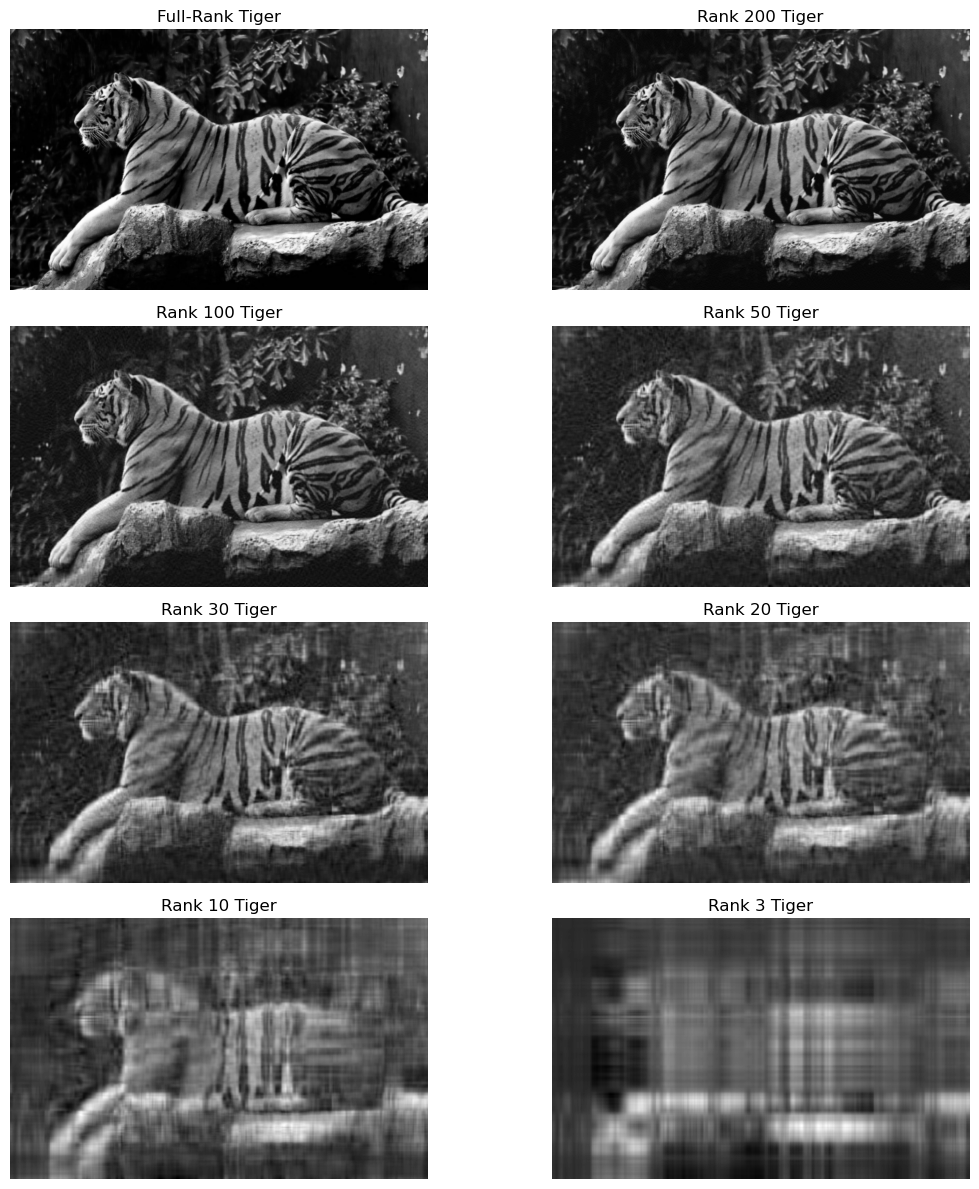

In [42]:
# Show full-rank image
plt.figure(figsize=(12, 12))
plt.subplot(4, 2, 1)
plt.imshow(tiger_resized, cmap='gray')
plt.title('Full-Rank Tiger')
plt.axis('off')

# Low-rank approximations
ranks = [200, 100, 50, 30, 20, 10, 3]

for i, rank in enumerate(ranks):
    # Create a zero array of the same shape as original singular values
    approx_sigmas = np.zeros_like(sigmas)
    
    # Retain only the top 'rank' singular values
    approx_sigmas[:rank] = sigmas[:rank]
    
    # Construct a diagonal matrix from the truncated singular values
    approx_S = np.diag(approx_sigmas)

    # Reconstruct low-rank image
    approx_tiger = np.dot(U, np.dot(approx_S, Vt))

    plt.subplot(4, 2, i + 2)
    plt.imshow(approx_tiger, cmap='gray')
    plt.title(f'Rank {rank} Tiger')
    plt.axis('off')

plt.tight_layout()
plt.show()